# Step 1: Gathering Data

# This time you need to add comments
There are questions above the code. You can take them as a guidance of what you can write in the comments.
If possible, please replace "# add comments here" to your own comments

What are we importing and why?

In [2]:
# add comments here

import numpy as np                # add comments here
import matplotlib.pyplot as plt   # add comments here
import seaborn as sns             # add comments here
import pandas as pd               # add comments here
%matplotlib inline

why are we giving column features?

In [3]:
# add comments here

column_features = ['Forehead_width','Cheeks_width','Jawline_length','Face_length','Face_Type']

what does "df" do?

In [4]:
# add comments here

df = pd.read_csv('faces_data.csv', names=column_features)

# Step 2: Preparing Data

*   why area we looking at this?
*   what can we learn from our data when we look at this?

In [5]:
# add comments here

df.head(5)

,Forehead_width,Cheeks_width,Jawline_length,Face_length,Face_Type
0,13.734412,12.367397,17.727732,18.044504,square
1,20.422939,11.449610,15.774867,19.750843,square
2,13.169055,11.898801,13.916852,22.163556,square
3,12.270533,11.923147,16.648587,16.816854,square
4,15.848748,14.381366,16.513414,15.231728,square


* why are we getting this results?
* what does this result mean?
* How useful is it to look at the mean values of each column for this dataset?

In [6]:
# add comments here

df.describe()

,Forehead_width,Cheeks_width,Jawline_length,Face_length
count,600.000000,600.000000,600.000000,600.000000
mean,13.602732,12.963143,14.418586,18.969481
std,1.840389,1.290045,2.041782,2.289266
min,9.179306,8.189176,9.115659,13.094244
25%,12.120000,12.120000,12.711863,16.970370
50%,12.998000,12.490904,14.327400,20.120000
75%,15.113771,13.599873,15.398433,20.887000
max,21.649006,17.087449,20.362684,23.404060


- what are the types of faces can you change here?
- why are we doing this?
- write down the result for each of the targets

You can change to the following:
- "square"
- "diamond"
- "triangle"
- "oblong"
- "oval"
- "heart"

In [7]:
# add comments here
face_type_count = len(df[df["Face_Type"]=="square"])

print(face_type_count)

100


- why are we making this plot?
- what can we learn from this plot?
- which datapoints are overlapping?
- which graph show us a seperation of the classes?

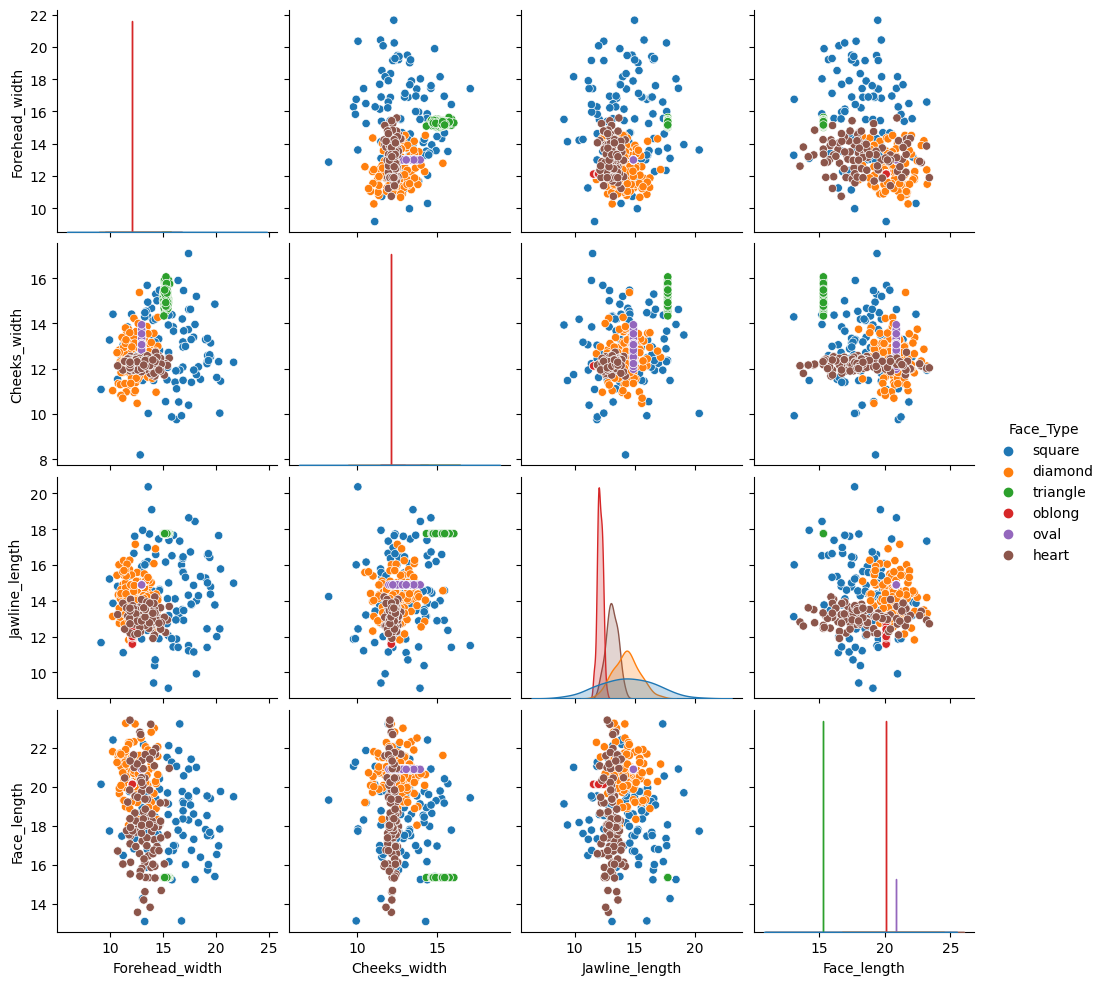

In [8]:
# add comments here

sns.pairplot(df, hue='Face_Type')

<Axes: >

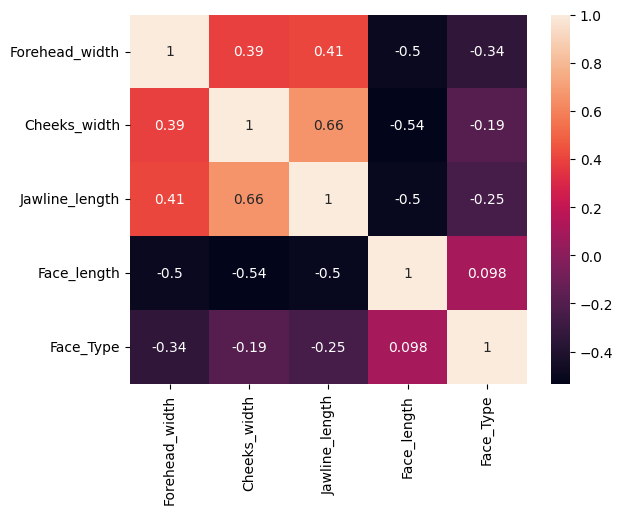

In [11]:
# making a correlation matrix

types = {'square': 0, 'diamond': 0.2, 'triangle': 0.4, 'oblong': 0.6, 'oval': 0/8, 'heart': 1}
new_df = df.copy()

new_df['Face_Type'] = [types[item] for item in new_df['Face_Type']]
m = new_df.corr()

# making a heatmap

sns.heatmap(m, annot=True)

- what does "[:]" mean?
- why are we saving these values in "X" and "Y"?

In [9]:
# add comments here

data = df.values    # add comments here
X = data[:,0:4]     # add comments here
Y = data[:,4]       # add comments here

why do we need to use .reshape()?

In [10]:
# add comments here

Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])    # add comments here
Y_Data_reshaped = Y_Data.reshape(4,6)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(column_features)-1)
width = 0.1

- what are we plotting and why?
- what can we learn from this data?
- which features are similar?

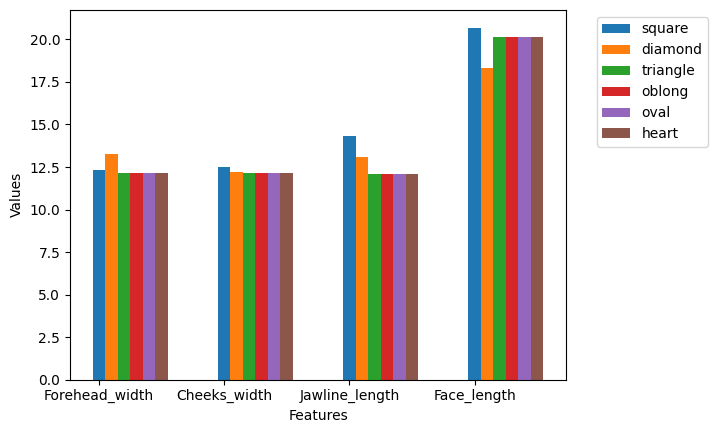

In [11]:
# add comments here

plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'square')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'diamond')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'triangle')
plt.bar(X_axis+width*3, Y_Data_reshaped[2], width, label = 'oblong')
plt.bar(X_axis+width*4, Y_Data_reshaped[2], width, label = 'oval')
plt.bar(X_axis+width*5, Y_Data_reshaped[2], width, label = 'heart')
plt.xticks(X_axis, column_features[:4])
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

# Step 3: Choosing a Model

- what does "train_test_split" do and why are we using it?

In [12]:
# add comments here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)   # add comments here

- why are we using this model and what is another model we could use?:

In [13]:
# add comments here

from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

# you can consider a Decision Tree Classifier
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier()                     # save decision tree
# if you're using decision tree, you'll just need to change the code below from "svn" to "dt"

SVC()

- what does ".predict()" do?

In [14]:
# add comments here

predictions = svn.predict(X_test)

# what does "accuracy_score" does and what does it mean?
# add comments here

from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8111111111111111

# Step 4: Evaluation

- what is "classification_report" and what does it do?
- why are we using it and what can we learn from it?

In [15]:
# add comments here

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

     diamond       0.67      0.65      0.66        34
       heart       0.82      0.54      0.65        26
      oblong       0.79      1.00      0.88        26
        oval       0.69      1.00      0.82        27
      square       0.96      0.73      0.83        37
    triangle       1.00      1.00      1.00        30

    accuracy                           0.81       180
   macro avg       0.82      0.82      0.81       180
weighted avg       0.83      0.81      0.81       180



# Step 5 Deployment

- If i gave you data on new faces, can you predict their type?
- What can we learn from our new set of data?

In [16]:
# add comments here

X_new = np.array([[13.73, 12.36, 17.24,18],[11, 11, 13,18],[15, 15, 17.24,15],[12.92,12.43, 14.88,20.88],[11.81, 12.93, 12.82,17.47]])

prediction = svn.predict(X_new)
print("Prediction of Face type: {}".format(prediction))

Prediction of Face type: ['square' 'heart' 'triangle' 'oval' 'heart']
